In [182]:
import math
from tools import *
%matplotlib inline
from matplotlib.patches import Circle
#importlib.reload(tools)

In [93]:
# Prefix for data storage
prefix = "data/"

# File containing coordinates of the site
coord_sites_file = "Coordinates.csv"

# Extension suffix for site antenna
suffix = "_Antennes.csv"

sites = get_features(prefix, coord_sites_file, suffix)

In [94]:
sites
s1, s2, s3, s4 = list(sites.keys())

In [95]:
api = overpass.API()
for site in sites:
    #print ("J'ai tourné")
    sites[site]['buildings'] = call_api_mapQuery(site, api, sites)

### Valeurs d'atténuation

In [175]:
att_h, att_v = extract_radiation_value("data/antenna/80010664_0821_x_co_m45_02t.msi")

# Un exemple avec s1 = 'GE_0002A'

In [102]:
F = map_to_antenna(sites, s1)

In [103]:
F

{'Antennes': [{'Antenna': 'K80010664',
   'Azimuth': 45.0,
   'ERP(W)': 820,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 30.3,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '1STK',
   'Sector Number': 1,
   'X': 0.0,
   'Y': 0.0},
  {'Antenna': 'K80010664',
   'Azimuth': 140.0,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 30.3,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '2STK',
   'Sector Number': 2,
   'X': 0.0,
   'Y': 0.0},
  {'Antenna': 'K80010664',
   'Azimuth': 240.0,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 30.0,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '3STKE',
   'Sector Number': 3,
   'X': -2.9,
   'Y': -5.3}],
 'GE_0002A': {'LAT': 46.21074101, 'LON': 6.14432884},
 'buildings': {61641473: array([[ -87.42396154,   49.2913336 ],
         [-110.94585406,   27.98470687],
         [-265.44672785, -108.77177663

Circle((0,0),r=91)
Circle((0,0),r=91)
Circle((-2.9,-5.3),r=91)


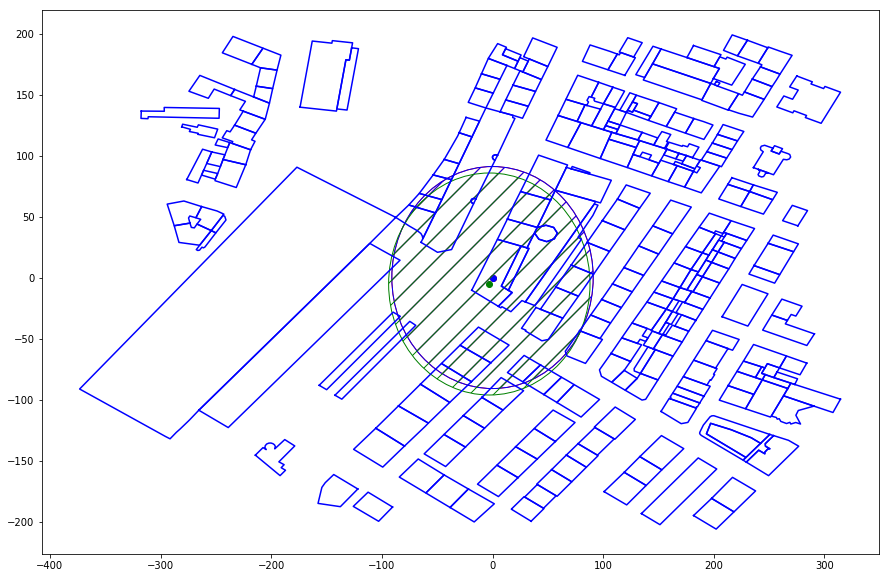

In [117]:
plt.figure(figsize = (15, 10))
# Positionnoment des buildings
for b in F['buildings']:
    plt.plot(F['buildings'][b][:, 0], F['buildings'][b][:, 1], color = 'b')


# Positionnement des antennes et de leurs périmètres
col = ['r', 'b', 'g', 'k', 'm']
d = 0
for a in F['Antennes']:
    plt.scatter(a['X'], a['Y'], c=col[d])
    a_field = plt.Circle((a['X'], a['Y']), a['Perimeter'], color=col[d], fill=False, hatch = '/')
    print (a_field)
    plt.gcf().gca().add_artist(a_field)
    d += 1
plt.show()

## Champ électrique pour une antenne : a1

In [127]:
a1, a2, a3 = F['Antennes']

## Discrétisation des polynomes

In [130]:
F['buildings']

{61641473: array([[ -87.42396154,   49.2913336 ],
        [-110.94585406,   27.98470687],
        [-265.44672785, -108.77177663],
        [-273.53968377, -116.44171698],
        [-274.85325846, -117.63283979],
        [-282.4341429 , -124.2341092 ],
        [-285.76260757, -126.91691852],
        [-291.43992191, -132.21574523],
        [-295.52536183, -130.32330712],
        [-373.18211632,  -91.38360999],
        [-176.80270033,   90.44629652],
        [ -87.42396154,   49.2913336 ]]),
 82590576: array([[ 100.81797057, -175.51918201],
        [ 111.404492  , -181.15196839],
        [ 121.24517018, -186.38400317],
        [ 138.84484462, -170.46525905],
        [ 119.04103638, -159.66722983],
        [ 110.71430869, -166.9141546 ],
        [ 100.81797057, -175.51918201]]),
 82590582: array([[ 152.2811552 , -109.77365563],
        [ 161.86579764, -115.03908638],
        [ 170.515353  , -119.79244563],
        [ 176.56002297, -118.76830265],
        [ 180.31150323, -113.16891224],
      

In [138]:
bat1 = F['buildings'][61641473]

In [139]:
bat1

array([[ -87.42396154,   49.2913336 ],
       [-110.94585406,   27.98470687],
       [-265.44672785, -108.77177663],
       [-273.53968377, -116.44171698],
       [-274.85325846, -117.63283979],
       [-282.4341429 , -124.2341092 ],
       [-285.76260757, -126.91691852],
       [-291.43992191, -132.21574523],
       [-295.52536183, -130.32330712],
       [-373.18211632,  -91.38360999],
       [-176.80270033,   90.44629652],
       [ -87.42396154,   49.2913336 ]])

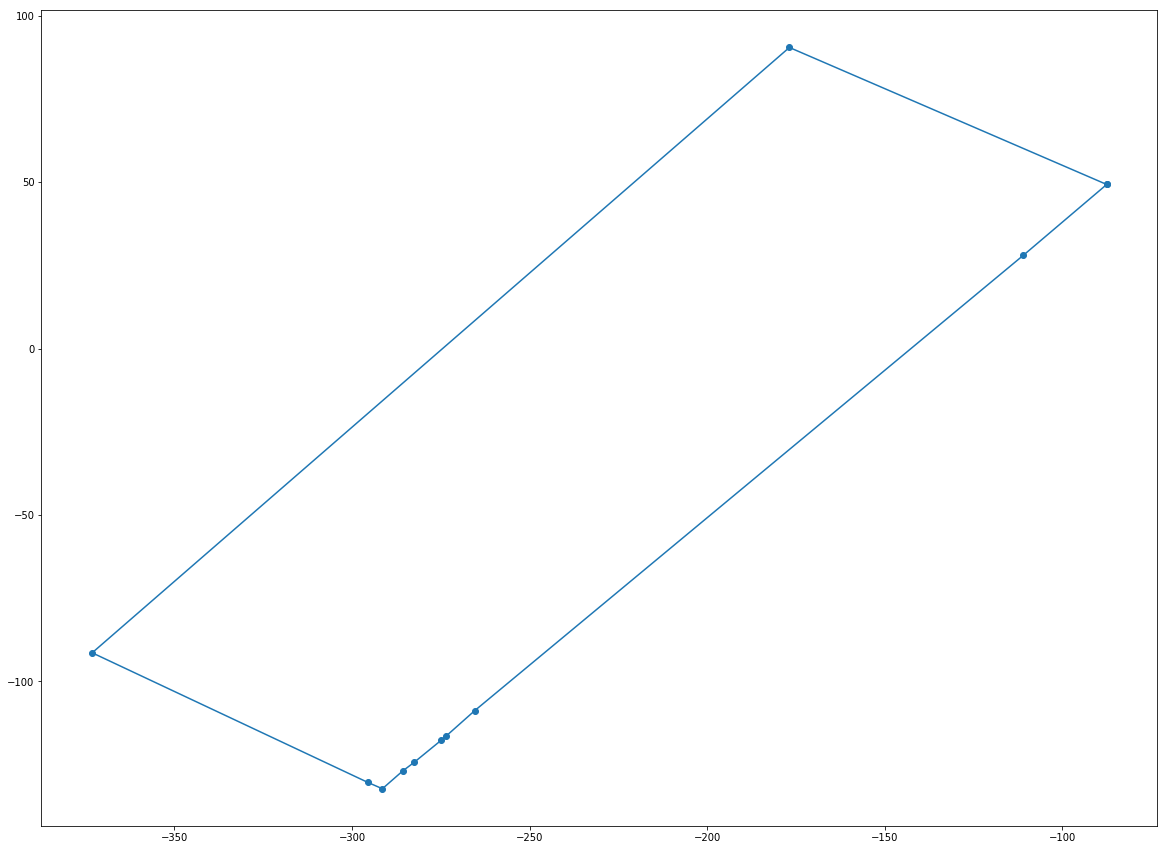

In [147]:
plt.figure(figsize = (20, 15))
plt.plot(bat1[:, 0], bat1[:, 1], '-o')
plt.show()

In [148]:
def discretize(bat):
    """
    
    """

In [157]:
bat1[0]

array([-87.42396154,  49.2913336 ])

In [158]:
def discretize(bat, step):
	"""
	Given a numpy array of the bat represented by a polygon
	Returns a numpy array of coordinates in facade
	"""

	# List of pnew positions
	p = []

	for k in range(len(bat)):
		if k == 0:
			p.append(bat[k])
		else :
			p2 = bat[k]
			p1 = bat[k - 1]
			p.append(p1 + p2 * k/step)

	return np.array(p)

In [159]:
discretize(bat1, 10)

array([[ -87.42396154,   49.2913336 ],
       [ -98.51854695,   52.08980429],
       [-164.03519963,    6.23035154],
       [-347.50863298, -143.70429173],
       [-383.48098716, -163.49485289],
       [-416.07032991, -179.74989439],
       [-453.89170744, -200.38426031],
       [-489.77055291, -219.46794018],
       [-527.86021137, -236.47439093],
       [-631.38926651, -212.56855611],
       [-549.98481665,   -0.93731346],
       [-272.96905802,  144.66676348]])

In [169]:
def discretize(bat, step):
	"""
	Given a numpy array of the bat represented by a polygon
	Returns a numpy array of coordinates in facade
	"""

	# List of pnew positions
	p = []

	p.append(bat[0])

	for k in range(1, len(bat)):
		if k == 0:
			p.append(bat[k])
		else :
			p2 = bat[k]
			p1 = bat[k - 1]
			for i in range(step):
				p.append(p1 + (p2 - p1) * i/step)

	p.append(bat[0])
	return np.array(p)

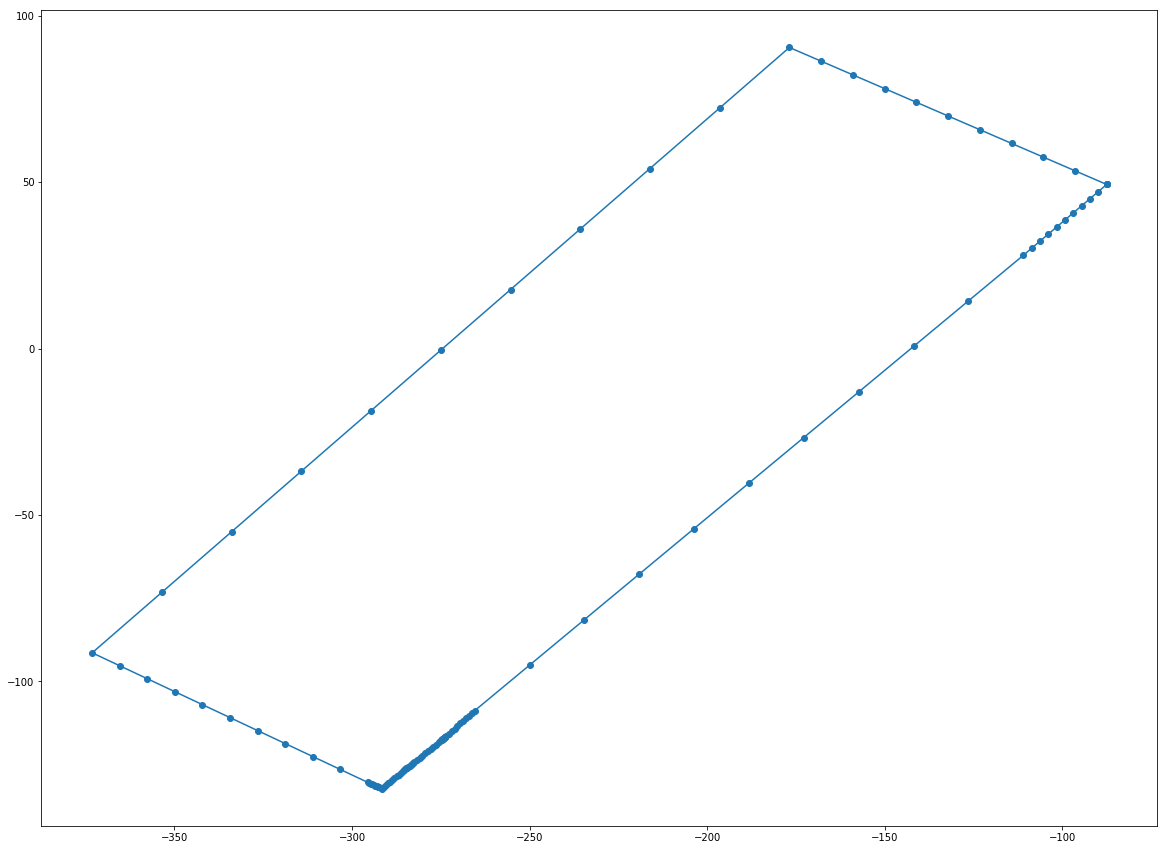

In [170]:
plot_bat(discretize(bat1, 10))

In [187]:
d1 = discretize(bat1, 10)

In [176]:
att_v

{0.0: 0.17,
 1.0: 0.04,
 2.0: 0.0,
 3.0: 0.05,
 4.0: 0.18,
 5.0: 0.41,
 6.0: 0.72,
 7.0: 1.13,
 8.0: 1.62,
 9.0: 2.22,
 10.0: 2.92,
 11.0: 3.74,
 12.0: 4.68,
 13.0: 5.76,
 14.0: 6.99,
 15.0: 8.41,
 16.0: 10.04,
 17.0: 11.94,
 18.0: 14.19,
 19.0: 16.87,
 20.0: 20.11,
 21.0: 23.75,
 22.0: 26.06,
 23.0: 24.98,
 24.0: 22.85,
 25.0: 21.18,
 26.0: 20.06,
 27.0: 19.39,
 28.0: 19.07,
 29.0: 19.04,
 30.0: 19.26,
 31.0: 19.72,
 32.0: 20.39,
 33.0: 21.31,
 34.0: 22.5,
 35.0: 24.02,
 36.0: 25.99,
 37.0: 28.65,
 38.0: 32.52,
 39.0: 38.87,
 40.0: 41.37,
 41.0: 34.37,
 42.0: 30.18,
 43.0: 27.47,
 44.0: 25.56,
 45.0: 24.16,
 46.0: 23.12,
 47.0: 22.36,
 48.0: 21.82,
 49.0: 21.47,
 50.0: 21.28,
 51.0: 21.25,
 52.0: 21.34,
 53.0: 21.56,
 54.0: 21.89,
 55.0: 22.32,
 56.0: 22.84,
 57.0: 23.45,
 58.0: 24.15,
 59.0: 24.92,
 60.0: 25.76,
 61.0: 26.68,
 62.0: 27.67,
 63.0: 28.76,
 64.0: 29.93,
 65.0: 31.22,
 66.0: 32.63,
 67.0: 34.18,
 68.0: 35.88,
 69.0: 37.69,
 70.0: 39.49,
 71.0: 41.02,
 72.0: 41.91,
 73.0:

In [177]:
a1

{'Antenna': 'K80010664',
 'Azimuth': 45.0,
 'ERP(W)': 820,
 'ElecTilt': -2,
 'Frequency': 800,
 'Hight': 30.3,
 'MecaTilit': 0,
 'Operator': 'Salt',
 'Perimeter': 91,
 'Sector Name': '1STK',
 'Sector Number': 1,
 'X': 0.0,
 'Y': 0.0}

In [178]:
a2

{'Antenna': 'K80010664',
 'Azimuth': 140.0,
 'ERP(W)': 1200,
 'ElecTilt': -2,
 'Frequency': 800,
 'Hight': 30.3,
 'MecaTilit': 0,
 'Operator': 'Salt',
 'Perimeter': 91,
 'Sector Name': '2STK',
 'Sector Number': 2,
 'X': 0.0,
 'Y': 0.0}

In [179]:
a3

{'Antenna': 'K80010664',
 'Azimuth': 240.0,
 'ERP(W)': 1200,
 'ElecTilt': -2,
 'Frequency': 800,
 'Hight': 30.0,
 'MecaTilit': 0,
 'Operator': 'Salt',
 'Perimeter': 91,
 'Sector Name': '3STKE',
 'Sector Number': 3,
 'X': -2.9,
 'Y': -5.3}

In [186]:
np.arccos(0.5)

1.0471975511965976

In [207]:
A1 = np.array([a1['X'], a1['Y']])

In [210]:
distance = np.linalg.norm(d1 - A1, axis = 1)

In [211]:
d1

array([[ -87.42396154,   49.2913336 ],
       [ -87.42396154,   49.2913336 ],
       [ -89.77615079,   47.16067093],
       [ -92.12834004,   45.03000825],
       [ -94.4805293 ,   42.89934558],
       [ -96.83271855,   40.76868291],
       [ -99.1849078 ,   38.63802023],
       [-101.53709705,   36.50735756],
       [-103.88928631,   34.37669489],
       [-106.24147556,   32.24603221],
       [-108.59366481,   30.11536954],
       [-110.94585406,   27.98470687],
       [-126.39594144,   14.30905852],
       [-141.84602882,    0.63341017],
       [-157.2961162 ,  -13.04223818],
       [-172.74620358,  -26.71788653],
       [-188.19629096,  -40.39353488],
       [-203.64637834,  -54.06918323],
       [-219.09646571,  -67.74483158],
       [-234.54655309,  -81.42047993],
       [-249.99664047,  -95.09612828],
       [-265.44672785, -108.77177663],
       [-266.25602344, -109.53877067],
       [-267.06531904, -110.3057647 ],
       [-267.87461463, -111.07275874],
       [-268.68391022, -1

In [212]:
distance

array([ 100.36226691,  100.36226691,  101.40949725,  102.5442962 ,
        103.76379073,  105.06503171,  106.44502122,  107.90073788,
        109.42915955,  111.02728368,  112.69214489,  114.42083006,
        127.2033143 ,  141.84744305,  157.83588992,  174.80016107,
        192.48241891,  210.70197907,  229.33081671,  248.27682155,
        267.47260395,  286.86802666,  287.90799277,  288.94851853,
        289.98959791,  291.03122498,  292.07339387,  293.1160988 ,
        294.15933408,  295.20309409,  296.24737326,  297.29216615,
        297.45968757,  297.62722036,  297.79476447,  297.96231991,
        298.12988663,  298.29746464,  298.4650539 ,  298.63265441,
        298.80026613,  298.96788905,  299.92472476,  300.88187597,
        301.8393397 ,  302.79711296,  303.75519285,  304.71357645,
        305.67226093,  306.63124344,  307.59052122,  308.55009149,
        308.96280589,  309.37556045,  309.78835503,  310.20118946,
        310.61406358,  311.02697723,  311.43993027,  311.85292

In [218]:
Az1 = np.array([np.sin(a1['Azimuth'] * math.pi / 360), np.cos(a1['Azimuth'] * math.pi / 360)])

In [219]:
Az1

array([ 0.38268343,  0.92387953])

In [226]:
np.hstack((distance.reshape(-1, 1), distance.reshape(-1, 1)))

array([[ 100.36226691,  100.36226691],
       [ 100.36226691,  100.36226691],
       [ 101.40949725,  101.40949725],
       [ 102.5442962 ,  102.5442962 ],
       [ 103.76379073,  103.76379073],
       [ 105.06503171,  105.06503171],
       [ 106.44502122,  106.44502122],
       [ 107.90073788,  107.90073788],
       [ 109.42915955,  109.42915955],
       [ 111.02728368,  111.02728368],
       [ 112.69214489,  112.69214489],
       [ 114.42083006,  114.42083006],
       [ 127.2033143 ,  127.2033143 ],
       [ 141.84744305,  141.84744305],
       [ 157.83588992,  157.83588992],
       [ 174.80016107,  174.80016107],
       [ 192.48241891,  192.48241891],
       [ 210.70197907,  210.70197907],
       [ 229.33081671,  229.33081671],
       [ 248.27682155,  248.27682155],
       [ 267.47260395,  267.47260395],
       [ 286.86802666,  286.86802666],
       [ 287.90799277,  287.90799277],
       [ 288.94851853,  288.94851853],
       [ 289.98959791,  289.98959791],
       [ 291.03122498,  2

In [227]:
(d1 - A1) / distance.reshape(-1, 1)

array([[-0.87108397,  0.49113412],
       [-0.87108397,  0.49113412],
       [-0.88528346,  0.46505182],
       [-0.89842481,  0.43912738],
       [-0.91053467,  0.41343271],
       [-0.92164555,  0.38803284],
       [-0.93179471,  0.3629857 ],
       [-0.94102319,  0.33834206],
       [-0.9493748 ,  0.31414565],
       [-0.95689521,  0.29043341],
       [-0.96363118,  0.26723575],
       [-0.96962987,  0.24457703],
       [-0.99365289,  0.11248967],
       [-0.99999003,  0.00446543],
       [-0.99658016, -0.08263164],
       [-0.98824968, -0.15284818],
       [-0.97773237, -0.20985571],
       [-0.96651384, -0.2566145 ],
       [-0.95537298, -0.29540222],
       [-0.94469774, -0.32794233],
       [-0.9346626 , -0.35553596],
       [-0.92532699, -0.37917009],
       [-0.92479553, -0.3804645 ],
       [-0.9242661 , -0.38174885],
       [-0.9237387 , -0.38302325],
       [-0.92321334, -0.38428781],
       [-0.92269002, -0.38554264],
       [-0.92216873, -0.38678783],
       [-0.92164948,

In [233]:
np.dot((d1 - A1) / distance.reshape(-1, 1), Az1)

array([ 0.12039936,  0.12039936,  0.09086854,  0.06188851,  0.03351549,
        0.00579712, -0.02122734, -0.04752668, -0.07307727, -0.09786246,
       -0.12187205, -0.14510157, -0.2763276 , -0.3785541 , -0.4577164 ,
       -0.51940009, -0.56804337, -0.60694972, -0.63852147, -0.66449938,
       -0.68615229, -0.7044148 , -0.70540729, -0.70639127, -0.70736684,
       -0.7083341 , -0.70929314, -0.71024406, -0.71118696, -0.71212193,
       -0.71304906, -0.71396844, -0.71410529, -0.71424197, -0.71437846,
       -0.71451477, -0.7146509 , -0.71478685, -0.71492263, -0.71505822,
       -0.71519363, -0.71532887, -0.71604749, -0.7167608 , -0.71746883,
       -0.71817166, -0.71886932, -0.71956188, -0.72024939, -0.72093191,
       -0.72160947, -0.72228213, -0.7225318 , -0.72278071, -0.72302886,
       -0.72327625, -0.7235229 , -0.7237688 , -0.72401396, -0.72425837,
       -0.72450205, -0.724745  , -0.72530278, -0.72585748, -0.72640913,
       -0.72695774, -0.72750334, -0.72804596, -0.72858562, -0.72

In [252]:
hor = np.arccos(np.dot((d1 - A1) / distance.reshape(-1, 1), Az1))*360 / math.pi

In [275]:
[att_h[np.round(y)] for y in hor]

[48.26,
 48.26,
 65.86,
 50.81,
 46.12,
 43.87,
 42.74,
 42.52,
 43.15,
 44.67,
 46.54,
 46.18,
 33.27,
 28.27,
 26.01,
 24.72,
 23.63,
 22.22,
 21.02,
 19.68,
 18.31,
 17.28,
 17.28,
 17.28,
 17.28,
 17.28,
 17.28,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.94,
 16.6,
 16.6,
 16.6,
 16.6,
 16.6,
 16.6,
 16.6,
 16.6,
 16.6,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 15.94,
 15.94,
 15.94,
 15.94,
 15.94,
 15.94,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 16.27,
 17.28,
 17.97,
 18.65,
 19.34,
 20.02,
 20.69,
 21.33,
 21.93,
 22.49,
 22.75,
 23.82,
 24.55,
 25.45,
 26.33,
 27.97,
 30.8,
 35.86,
 46.18,
 42.52,
 58.11,
 58.11,
 65.86,
 65.86,
 65.86,
 61.33,
 61.33,
 54.98,
 54.98,
 51.06,
 48.26]

In [274]:
hor[0]

166.16969748980787

In [261]:
att_h

{0.0: 0.0,
 1.0: 0.01,
 2.0: 0.02,
 3.0: 0.04,
 4.0: 0.06,
 5.0: 0.09,
 6.0: 0.12,
 7.0: 0.16,
 8.0: 0.2,
 9.0: 0.25,
 10.0: 0.31,
 11.0: 0.36,
 12.0: 0.43,
 13.0: 0.5,
 14.0: 0.57,
 15.0: 0.65,
 16.0: 0.73,
 17.0: 0.82,
 18.0: 0.92,
 19.0: 1.02,
 20.0: 1.13,
 21.0: 1.24,
 22.0: 1.35,
 23.0: 1.47,
 24.0: 1.6,
 25.0: 1.73,
 26.0: 1.86,
 27.0: 2.0,
 28.0: 2.14,
 29.0: 2.29,
 30.0: 2.44,
 31.0: 2.59,
 32.0: 2.75,
 33.0: 2.92,
 34.0: 3.09,
 35.0: 3.26,
 36.0: 3.44,
 37.0: 3.62,
 38.0: 3.81,
 39.0: 4.0,
 40.0: 4.19,
 41.0: 4.38,
 42.0: 4.58,
 43.0: 4.79,
 44.0: 4.99,
 45.0: 5.21,
 46.0: 5.42,
 47.0: 5.64,
 48.0: 5.86,
 49.0: 6.08,
 50.0: 6.31,
 51.0: 6.54,
 52.0: 6.77,
 53.0: 7.01,
 54.0: 7.25,
 55.0: 7.49,
 56.0: 7.74,
 57.0: 7.98,
 58.0: 8.23,
 59.0: 8.48,
 60.0: 8.74,
 61.0: 8.99,
 62.0: 9.25,
 63.0: 9.51,
 64.0: 9.77,
 65.0: 10.03,
 66.0: 10.29,
 67.0: 10.55,
 68.0: 10.82,
 69.0: 11.09,
 70.0: 11.35,
 71.0: 11.63,
 72.0: 11.9,
 73.0: 12.17,
 74.0: 12.44,
 75.0: 12.71,
 76.0: 12.98,
 77.

In [295]:
Attenuation = np.array(list(att_h.values()))[np.rint(hor).astype(int)]

In [313]:
E = np.sqrt(a1['ERP(W)'] / np.exp(Attenuation/10 * np.log(10))) * 7 / distance

In [296]:
a1

{'Antenna': 'K80010664',
 'Azimuth': 45.0,
 'ERP(W)': 820,
 'ElecTilt': -2,
 'Frequency': 800,
 'Hight': 30.3,
 'MecaTilit': 0,
 'Operator': 'Salt',
 'Perimeter': 91,
 'Sector Name': '1STK',
 'Sector Number': 1,
 'X': 0.0,
 'Y': 0.0}

In [318]:
d1[E.argmax()]

array([-289.73672761, -130.62609722])

In [319]:
E.max()

0.10065181282283274

In [320]:
E

array([ 0.00771675,  0.00771675,  0.00100676,  0.0056311 ,  0.00954903,
        0.01221931,  0.01373661,  0.0138989 ,  0.01274594,  0.0105457 ,
        0.00837744,  0.00860003,  0.03419846,  0.05453602,  0.06357688,
        0.0665983 ,  0.0685668 ,  0.07367775,  0.07772175,  0.0837662 ,
        0.09103862,  0.09557027,  0.09522506,  0.09488214,  0.09454151,
        0.09420314,  0.09386701,  0.09726695,  0.09692199,  0.0965793 ,
        0.09623886,  0.09590064,  0.09584663,  0.09579268,  0.09573878,
        0.09568495,  0.09563117,  0.09557744,  0.09552378,  0.09547016,
        0.09541661,  0.09536311,  0.09505888,  0.09853918,  0.0982266 ,
        0.0979159 ,  0.09760707,  0.09730007,  0.09699491,  0.09669156,
        0.09639001,  0.09609024,  0.09967787,  0.09954489,  0.09941224,
        0.09927994,  0.09914798,  0.09901635,  0.09888506,  0.0987541 ,
        0.09862348,  0.09849319,  0.09826251,  0.09803285,  0.09780419,
        0.09757653,  0.09734987,  0.0971242 ,  0.10065181,  0.10

In [323]:
Enp.where(E == E.max())[0]

array([68])

In [324]:
def OMEN_bat_antenna(bat, antenna, (att_h, att_v) = extract_radiation_value("data/antenna/80010664_0821_x_co_m45_02t.msi")):
	"""
	Given a polygon representing a building, find the OMEN for this building for every antenna
	"""

	disc = discretize(bat, 10)

	# Position of the antenna
	A = np.array(antenna['X'], antenna['Y'])

	# Matrix distance discretized building - antenna
	distance = np.linalg.norm(disc - A, axis = 1)

	# Azimut vector of antenna
	Az = np.array([np.sin(antenna['Azimuth'] * math.pi / 360), np.cos(antenna['Azimuth'] * math.pi / 360)])

	# Horizontal attenuation
	hor = np.arccos(np.dot((disc - A) / distance.reshape(-1, 1), Az)) * 360 / math.pi
	Att_h = np.array(list(att_h.values()))[np.rint(hor).astype(int)]

	# Electric field evaluated for every point on the discretized facade :
	E = np.sqrt(a1['ERP(W)'] / np.exp(Attenuation/10 * np.log(10))) * 7 / distance

	return (disc[E.argmax(), E.max()])

SyntaxError: invalid syntax (<ipython-input-324-01594d835772>, line 1)

In [379]:
def OMEN_bat_antenna(bat, antenna, att_h, att_v):
	"""
	Given a polygon representing a building, find the OMEN for this building for every antenna
	"""

	disc = discretize(bat, 10)

	# Position of the antenna
	A = np.array([antenna['X'], antenna['Y']])

	# Matrix distance discretized building - antenna
	distance = np.linalg.norm(disc - A, axis = 1)

	# Azimut vector of antenna
	Az = np.array([np.sin(antenna['Azimuth'] * math.pi / 360), np.cos(antenna['Azimuth'] * math.pi / 360)])

	# Horizontal attenuation
	hor = np.arccos(np.dot((disc - A) / distance.reshape(-1, 1), Az)) * 360 / math.pi
	#return hor
	# Conversion of the azimuth = 0 as extracted in att_h and att_v
	# PLUS transforming dictionary into array for accession
	Att_h = np.vstack((np.array(list(att_h.values()))[int(antenna['Azimuth']):].reshape(-1, 1), np.array(list(att_h.values()))[:int(antenna['Azimuth'])].reshape(-1, 1)))[np.rint(hor).astype(int) % 360]

	# Electric field evaluated for every point on the discretized facade :
	E = np.sqrt(a1['ERP(W)'] / np.exp(Attenuation/10 * np.log(10))) * 7 / distance

	return (disc[E.argmax()], E.max())

def OMEN_site(site, att_h, att_v):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-379-57ce53c1b7f3>, line 29)

In [377]:
OMEN_bat_antenna(bat1, a1, att_h, att_v)

(array([-289.73672761, -130.62609722]), 0.10065181282283274)

In [378]:
OMEN_bat_antenna(bat1, a3, att_h, att_v)

(array([-289.73672761, -130.62609722]), 0.10219554204845245)

In [380]:
s1

'GE_0002A'

In [383]:
sites.keys()

dict_keys(['GE_0002A', 'GE_0014C', 'TG_3150D', 'ZH_0050A'])

In [346]:
a3

{'Antenna': 'K80010664',
 'Azimuth': 240.0,
 'ERP(W)': 1200,
 'ElecTilt': -2,
 'Frequency': 800,
 'Hight': 30.0,
 'MecaTilit': 0,
 'Operator': 'Salt',
 'Perimeter': 91,
 'Sector Name': '3STKE',
 'Sector Number': 3,
 'X': -2.9,
 'Y': -5.3}

In [384]:
F

{'Antennes': [{'Antenna': 'K80010664',
   'Azimuth': 45.0,
   'ERP(W)': 820,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 30.3,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '1STK',
   'Sector Number': 1,
   'X': 0.0,
   'Y': 0.0},
  {'Antenna': 'K80010664',
   'Azimuth': 140.0,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 30.3,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '2STK',
   'Sector Number': 2,
   'X': 0.0,
   'Y': 0.0},
  {'Antenna': 'K80010664',
   'Azimuth': 240.0,
   'ERP(W)': 1200,
   'ElecTilt': -2,
   'Frequency': 800,
   'Hight': 30.0,
   'MecaTilit': 0,
   'Operator': 'Salt',
   'Perimeter': 91,
   'Sector Name': '3STKE',
   'Sector Number': 3,
   'X': -2.9,
   'Y': -5.3}],
 'GE_0002A': {'LAT': 46.21074101, 'LON': 6.14432884},
 'buildings': {61641473: array([[ -87.42396154,   49.2913336 ],
         [-110.94585406,   27.98470687],
         [-265.44672785, -108.77177663

In [387]:
E_bat_antenna(bat1, a1, att_h, att_v)

array([ 0.00771675,  0.00771675,  0.00100676,  0.0056311 ,  0.00954903,
        0.01221931,  0.01373661,  0.0138989 ,  0.01274594,  0.0105457 ,
        0.00837744,  0.00860003,  0.03419846,  0.05453602,  0.06357688,
        0.0665983 ,  0.0685668 ,  0.07367775,  0.07772175,  0.0837662 ,
        0.09103862,  0.09557027,  0.09522506,  0.09488214,  0.09454151,
        0.09420314,  0.09386701,  0.09726695,  0.09692199,  0.0965793 ,
        0.09623886,  0.09590064,  0.09584663,  0.09579268,  0.09573878,
        0.09568495,  0.09563117,  0.09557744,  0.09552378,  0.09547016,
        0.09541661,  0.09536311,  0.09505888,  0.09853918,  0.0982266 ,
        0.0979159 ,  0.09760707,  0.09730007,  0.09699491,  0.09669156,
        0.09639001,  0.09609024,  0.09967787,  0.09954489,  0.09941224,
        0.09927994,  0.09914798,  0.09901635,  0.09888506,  0.0987541 ,
        0.09862348,  0.09849319,  0.09826251,  0.09803285,  0.09780419,
        0.09757653,  0.09734987,  0.0971242 ,  0.10065181,  0.10

In [405]:
for f in F['buildings']:
    print (f)

61641473
82590576
82590582
82590592
82590601
82681824
82681847
82681891
82681896
82683726
82683741
82683744
82683752
82753315
82753316
82753324
82753325
82753328
82753394
82753410
82753416
82753450
82753462
82753477
82753480
82753485
82833466
82833485
82833572
107633314
146234307
149781345
160572061
160572062
160572065
160572067
160572072
160572077
162179759
162179761
162179762
162179763
162179765
162179766
162179767
162179768
162179769
162179770
162179771
162179772
162179773
176675505
176675507
176675511
176675515
176675521
176675532
176675536
176675539
176675559
176675577
176675578
177630366
177630373
177630384
177630388
177630391
177630399
177630402
177630404
177630410
177630422
177630432
177630437
177630438
177630445
178880935
178880940
178880944
178880947
178880950
178880958
178880960
178880961
178880963
178880964
178880967
178880968
178880969
178880971
178880979
178880981
178880990
178880992
178880996
178880998
178880999
178881000
178881007
178881026
178881029
178881031
178881033

In [406]:
F['Antennes']

[{'Antenna': 'K80010664',
  'Azimuth': 45.0,
  'ERP(W)': 820,
  'ElecTilt': -2,
  'Frequency': 800,
  'Hight': 30.3,
  'MecaTilit': 0,
  'Operator': 'Salt',
  'Perimeter': 91,
  'Sector Name': '1STK',
  'Sector Number': 1,
  'X': 0.0,
  'Y': 0.0},
 {'Antenna': 'K80010664',
  'Azimuth': 140.0,
  'ERP(W)': 1200,
  'ElecTilt': -2,
  'Frequency': 800,
  'Hight': 30.3,
  'MecaTilit': 0,
  'Operator': 'Salt',
  'Perimeter': 91,
  'Sector Name': '2STK',
  'Sector Number': 2,
  'X': 0.0,
  'Y': 0.0},
 {'Antenna': 'K80010664',
  'Azimuth': 240.0,
  'ERP(W)': 1200,
  'ElecTilt': -2,
  'Frequency': 800,
  'Hight': 30.0,
  'MecaTilit': 0,
  'Operator': 'Salt',
  'Perimeter': 91,
  'Sector Name': '3STKE',
  'Sector Number': 3,
  'X': -2.9,
  'Y': -5.3}]

In [427]:
def E_bat_antenna(disc, antenna, att_h, att_v):
	"""
	Given a discretisation representing a building, find the OMEN for this building for every antenna
	"""
	# Position of the antenna
	A = np.array([antenna['X'], antenna['Y']])

	# Matrix distance discretized building - antenna
	distance = np.linalg.norm(disc - A, axis = 1)

	# Azimut vector of antenna
	Az = np.array([np.sin(antenna['Azimuth'] * math.pi / 360), np.cos(antenna['Azimuth'] * math.pi / 360)])

	# Horizontal attenuation
	hor = np.arccos(np.dot((disc - A) / distance.reshape(-1, 1), Az)) * 360 / math.pi
	#return hor
	# Conversion of the azimuth = 0 as extracted in att_h and att_v
	# PLUS transforming dictionary into array for accession
	Att_h = np.vstack((np.array(list(att_h.values()))[int(antenna['Azimuth']):].reshape(-1, 1), np.array(list(att_h.values()))[:int(antenna['Azimuth'])].reshape(-1, 1)))[np.rint(hor).astype(int) % 360]

	# Electric field evaluated for every point on the discretized facade :
	return np.sqrt(antenna['ERP(W)'] / np.exp(Attenuation / 10 * np.log(10))) * 7 / distance

def OMEN_bat(bat, antennas, att_h, att_v):
	"""
	Find the OMEN for a given building considering every antennas
	Return the E_OMEN per building
	"""

	# Discretisation of the building 10 points by facade
	disc = discretize(bat, 10)

	# Electrical field resulting
	E_facade = np.zeros((len(disc), 1))

	for a in antennas :
		E_facade[:, 0] += np.power(E_bat_antenna(disc, a, att_h, att_v), 2)

	E_facade = np.sqrt(E_facade)

	return (disc[E_facade.argmax()], E_facade.max())

def OMEN_per_site(mapped, att_h, att_v):
	"""
	Given a dictionary as returned by the map_to_antenna function
	"""

	# Dictionary of OMEN per building
	OMEN = {}

	for building in mapped['buildings']:
		OMEN[building] = OMEN_bat(mapped['buildings'][building], mapped['Antennes'], att_h, att_v)

	return OMEN

In [428]:
OMEN_per_site(F, att_h, att_v)

ValueError: operands could not be broadcast together with shapes (112,) (62,) 

In [429]:
OMEN_bat(bat1, F['Antennes'], att_h, att_v)

(array([-289.73672761, -130.62609722]), 0.2005994223875763)

In [430]:
OMEN_bat(list(F['buildings'].values())[4], F['Antennes'], att_h, att_v)

ValueError: operands could not be broadcast together with shapes (112,) (62,) 